# Домашнее задание 1 - Обучаем нашу первую нейросеть!

Для решения ДЗ вам очень помогут семинары 1 и 2 занятий

Как сдаем дз?
1. Копируем этот ноутбук (Файл -> Сохранить копию на Диске)
2. **Пишем свой ТГ**, чтобы легче было потом связаться. О результатах проверки сообщим в личные сообщения в телеграме!
3. Листаем, заполняем пропущенные ячейки, выполняем задания
4. Когда закончите - в левом верхнем углу нажимаете Поделиться, в общем доступе обязательно указываем "Все, у кого есть ссылка", далее нажимаем Копировать ссылку и прикладываем ссылку на степик в ответ к дз
5. Ждем фидбек в тг)

#### Дедлайн сдачи ДЗ
**30 сентября 23:59** очень прошу не опаздывать! Фидбек начнем рассылать после дедлайна дз, постараемся все проверить до дедлайна следующего ДЗ, но ничего не обещаем, мы без понятия сколько придет работ на проверку))

#### Задачи
1. Обучить нейронную сеть аппроксимировать сложную математическую функцию
2. Создать и обучить полносвязную нейронную сеть предсказания рака у пациентов
3. Небольшое бонусное задание на дополнительные баллы)

Всего можно получить 10 баллов + 2 доп. балла! <br>
По всем вопросам: @daniil_d_d <br>
**Удачи!**

**Мой телеграм:** (напишите пж) @

@metalrokus

# Задача 1. Обучить нейронную сеть аппроксимировать сложную математическую функцию

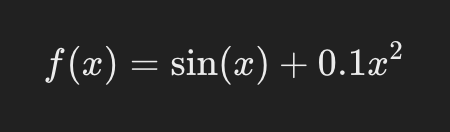

Представьте, что эта функция может описывать движение качелей: часть sin(x) отвечает за колебания назад-вперёд, а слагаемое 0.1x^2 отражает постепенное увеличение нагрузки (например, если на качели по очереди садятся люди). В общем не суть, просто хотел описать какой-то физический смысл))

В реальных прикладных задачах (и особенно в соревнованиях на Kaggle) часто встречается ситуация, когда у нас есть лишь набор входных данных и соответствующих выходов. При этом сама функция, которая связывает вход и выход, неизвестна или слишком сложна для явного задания. Задача сводится к тому, чтобы обучить модель приближать эту зависимость: поймать скрытый закон (не обязательно его как-то интерпретировать) и затем уметь предсказывать выходные значения для новых, ещё невиденных входов

In [1]:
# Импортируем нужные нам библиотеки (Shift+Enter чтобы выполнить ячейку)
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Генерация данных
np.random.seed(42)
x = np.linspace(-10, 10, 500).reshape(-1, 1) # генерируем 500 случайных иксов из интервала (-10, 10)
y = np.sin(x) + 0.1 * x**2 # получаем таргеты, которые надо научиться предсказывать

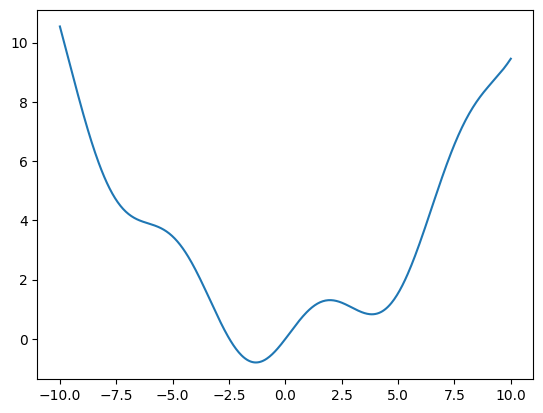

In [3]:
# Посмотрим как это выглядит)
plt.plot(x, y)
plt.show()

In [4]:
# Преобразование данных в тензоры PyTorch
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [5]:
# Определение нейронной сети
class FunctionApproximator(nn.Module):
    def __init__(self):
        super(FunctionApproximator, self).__init__()
        self.flat = nn.Flatten()
        self.tanh = nn.Tanh()
        self.l1 = nn.Linear(1, 64)
        self.l2 = nn.Linear(64, 32)
        self.l3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.l1(self.flat(x))
        x = self.l2(self.tanh(x))
        x = self.l3(self.tanh(x))
        return x

In [6]:
# Создание модели и определение функции потерь и оптимизатора
model = FunctionApproximator()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 0, Loss: 19.5870
Epoch 500, Loss: 0.1616
Epoch 1000, Loss: 0.0140
Epoch 1500, Loss: 0.0029
Epoch 2000, Loss: 0.0020
Epoch 2500, Loss: 0.0015
Epoch 3000, Loss: 0.0012
Epoch 3500, Loss: 0.0009
Epoch 4000, Loss: 0.0006
Epoch 4500, Loss: 0.0005


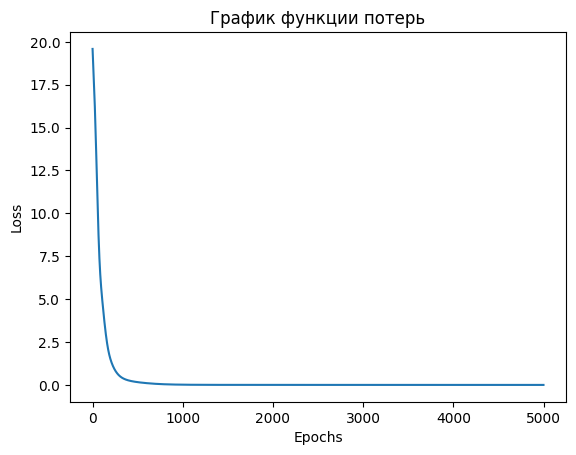

In [7]:
# Обучение модели
epochs = 5000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Визуализация функции потерь
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("График функции потерь")
plt.show()

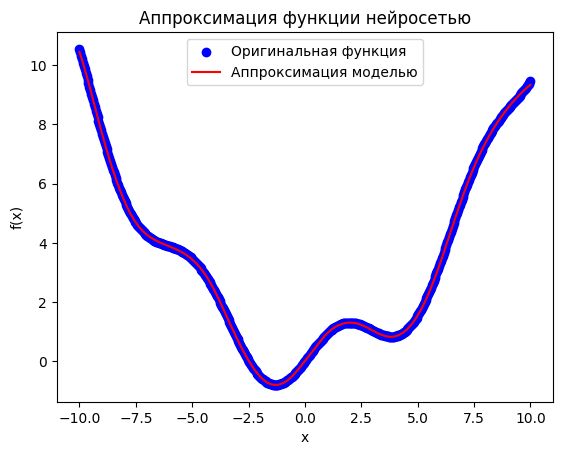

In [8]:
# Проверка модели
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

# Визуализация результата
plt.scatter(x, y, label="Оригинальная функция", color='blue')
plt.plot(x, y_pred, label="Аппроксимация моделью", color='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Аппроксимация функции нейросетью")
plt.show()

Должно получиться что-то такое)
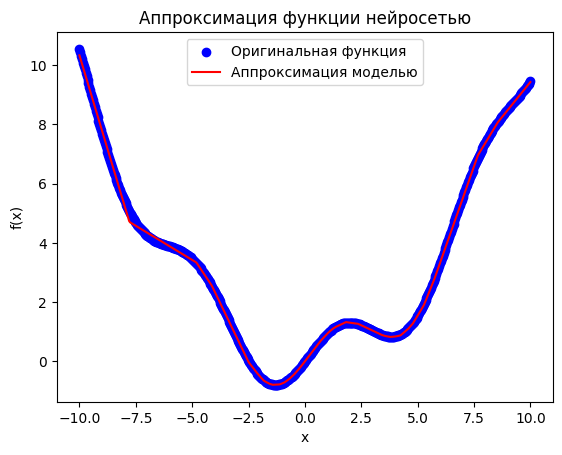

Вопрос: Почему если убрать функции активации (проверьте, если не пробовали), график выглядит примерно так (модель как прямая)?

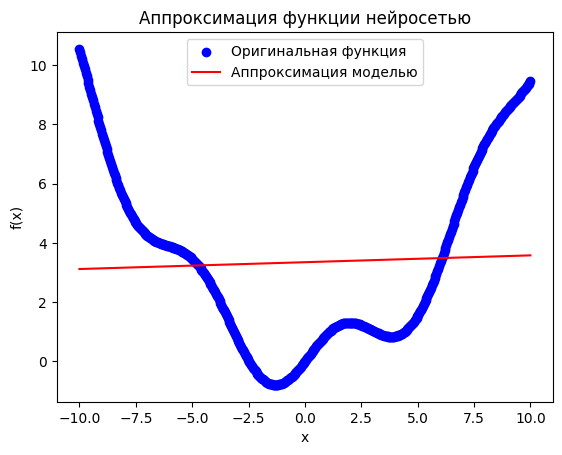

**Ответ**: В таком случае модель потеряет нелинейность, то есть превратится в серию линейных преобразований -> одну линейную функцию



# Задача 2. Создать и обучить полносвязную нейронную сеть для предсказания рака у пациентов

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Подгружаем учебный датасет на бинарную классификацию рака груди у пациентов. Подробнее можно почитать тут https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

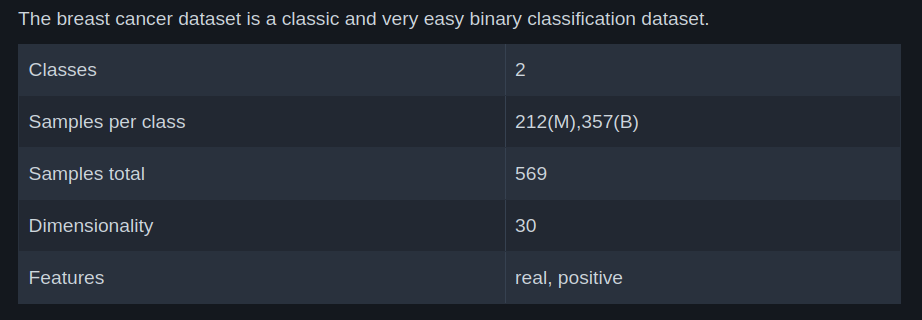

In [10]:
# Загрузка данных, мы взяли Breast Cancer Dataset
data = load_breast_cancer()
X, y = data.data, data.target

Дальше делаем стандартизацию входных данных, это означает, что мы входные данные переводим в распределение с средним значением равным 0 и стандартным отклонением равным 1. По сути мы из каждого сэмпла вычитаем среднее значение по каждой фиче и делим на стандартное отклонение по каждой фиче.

Кстати говоря, важно считать среднее и стандартное отклонение только на трейне, чтобы не было data leak. Это когда модель во время обучения получает информацию о тестовом наборе данных, это может сказаться на достоверности оценки качества модели.

In [11]:
# Предобработка данных
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler.fit(X_train) # считаем среднее и дисперсию только на трейне
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Конвертация в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Создание Dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [12]:
train_dataset[0] # фичи и лейбл

(tensor([-1.4408, -0.4353, -1.3621, -1.1391,  0.7806,  0.7189,  2.8231, -0.1191,
          1.0927,  2.4582, -0.2638, -0.0161, -0.4704, -0.4748,  0.8384,  3.2510,
          8.4389,  3.3920,  2.6212,  2.0612, -1.2329, -0.4763, -1.2479, -0.9740,
          0.7229,  1.1867,  4.6728,  0.9320,  2.0972,  1.8865]),
 tensor(1))

In [13]:
features, lable = train_dataset[0]
features

tensor([-1.4408, -0.4353, -1.3621, -1.1391,  0.7806,  0.7189,  2.8231, -0.1191,
         1.0927,  2.4582, -0.2638, -0.0161, -0.4704, -0.4748,  0.8384,  3.2510,
         8.4389,  3.3920,  2.6212,  2.0612, -1.2329, -0.4763, -1.2479, -0.9740,
         0.7229,  1.1867,  4.6728,  0.9320,  2.0972,  1.8865])

In [14]:
len(features)

30

In [15]:
# Создаем даталоадер

batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # надо вставить код вместо ???
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True) # надо вставить код вместо ???

Что такое даталоадер в документации: https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [16]:
# Определение нейросети
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flat = nn.Flatten()
        self.relu = nn.ReLU()
        self.l1 = nn.Linear(30, 64)
        self.l2 = nn.Linear(64, 32)
        self.l3 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.l1(self.flat(x))
        x = self.l2(self.relu(x))
        x = self.l3(self.relu(x))
        return x

CrossEntropyLoss - https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss

Если непонятно: <br>
Тут читаем про правдоподобие (likelihood) и зачем нам логарифм правдоподобия: https://education.yandex.ru/handbook/ml/article/linear-models <br>
Тут читаем про кросс-энтропию: https://education.yandex.ru/handbook/ml/article/pervoe-znakomstvo-s-polnosvyaznymi-nejrosetyami <br>

Если ваще ниче не понятно - ждем в чате)

In [17]:
# Инициализация модели, функции потерь и оптимизатора
model = MLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
train_losses = []

# Обучение модели
for epoch in range(epochs):
    epoch_loss = 0.0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.5420
Epoch [2/100], Loss: 0.4830
Epoch [3/100], Loss: 0.1764
Epoch [4/100], Loss: 0.0390
Epoch [5/100], Loss: 0.1275
Epoch [6/100], Loss: 0.1313
Epoch [7/100], Loss: 0.6488
Epoch [8/100], Loss: 0.0645
Epoch [9/100], Loss: 0.0571
Epoch [10/100], Loss: 0.0024
Epoch [11/100], Loss: 0.3747
Epoch [12/100], Loss: 0.0177
Epoch [13/100], Loss: 0.1042
Epoch [14/100], Loss: 0.0251
Epoch [15/100], Loss: 0.0146
Epoch [16/100], Loss: 0.0053
Epoch [17/100], Loss: 0.0078
Epoch [18/100], Loss: 0.0077
Epoch [19/100], Loss: 0.0015
Epoch [20/100], Loss: 0.0042
Epoch [21/100], Loss: 0.0073
Epoch [22/100], Loss: 0.0017
Epoch [23/100], Loss: 0.0433
Epoch [24/100], Loss: 0.0004
Epoch [25/100], Loss: 0.0036
Epoch [26/100], Loss: 0.0189
Epoch [27/100], Loss: 0.0152
Epoch [28/100], Loss: 0.0051
Epoch [29/100], Loss: 0.0012
Epoch [30/100], Loss: 0.0262
Epoch [31/100], Loss: 0.0014
Epoch [32/100], Loss: 0.0515
Epoch [33/100], Loss: 0.0055
Epoch [34/100], Loss: 0.0141
Epoch [35/100], Loss: 0

In [18]:
# пробуем выбить точность > 90%
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 96.49%


# Бонусное задание!

Будет круто, если посчитаете и оцените качество модели не только с метрикой accuracy. Оценивать качество модели только по метрике accuracy недостаточно. Эта метрика отражает лишь долю правильных предсказаний, но не учитывает возможный дисбаланс классов. В задачах классификации часто возникает ситуация, когда один класс встречается гораздо реже других.

Например, в медицинских данных количество пациентов с редким заболеванием обычно в разы меньше, чем число здоровых людей. Если в датасете больных в 10 раз меньше, чем здоровых, то модель, которая всегда будет предсказывать «здоров», получит accuracy = 90%. Однако такая модель абсолютно бесполезна — она не умеет выявлять заболевших.

Именно поэтому при дисбалансе классов используют дополнительные метрики: precision, recall, F1-score (macro/micro), а также анализируют confusion matrix. Эти метрики помогают понять, насколько хорошо модель справляется не только с «частыми» классами, но и с редкими, что особенно важно в критических областях вроде медицины.

Про метрики классификации читаем тут: https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii

С sklearn можно посчитать метрики https://scikit-learn.org/stable/api/sklearn.metrics.html#classification-metrics

Предлагаю посчитать precision, recall, F1, confusion matrix и все, что вы считаете нужным)

Также будет неплохо, если напишите небольшой отчет: что значат метрики, как их интерпретировать, что можно сказать про качество модели, на основе метрик)

In [19]:
# библиотеки для нужных метрик
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve)
import seaborn as sns

In [20]:
# Предсказания на тестовой выборке
preds = []
probs = []
labs = []

correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        preds.extend(predicted.cpu().numpy())
        probs.extend(probabilities.cpu().numpy())
        labs.extend(labels.cpu().numpy())

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 96.49%


In [21]:
preds = np.array(preds)
probs = np.array(probs)
labs = np.array(labs)

In [22]:
# Расчитываем метрики
accuracy = accuracy_score(labs, preds)
precision = precision_score(labs, preds, average='binary')
recall = recall_score(labs, preds, average='binary')
f1 = f1_score(labs, preds, average='binary')
auc_roc = roc_auc_score(labs, probs[:, 1])

In [23]:
# Confusion Matrix
cm = confusion_matrix(labs, preds)

# ROC Curve
fpr, tpr, _ = roc_curve(labs, probs[:, 1])

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(labs, probs[:, 1])

/tmp/ipython-input-745658079.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


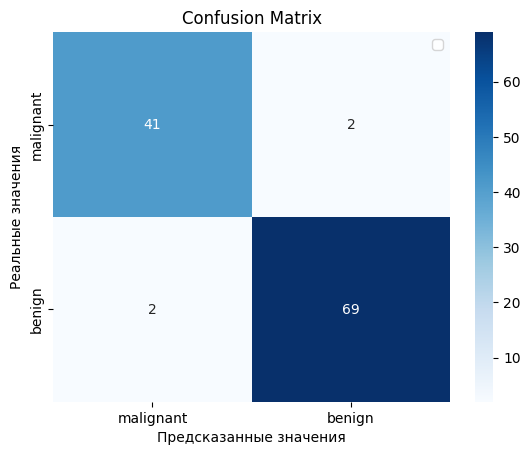

In [24]:
# Confusion Matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.legend()
plt.title('Confusion Matrix')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.show()

# Confusion Matrix отображает как часто модель правильно и неправильно
# предсказывает каждый класс

# По горизонтали отображены предсказанные ведичины, по вертикали - реальные, их
# пересечения отображаются как
# True Negative   False Positive
# False Negative  True Positive

# True Negative - правильно предсказанные отрицательные случаи
# False Positive - ложно-положительные
# False Negative - ложно-отрицательные
# True Positive - правильно предсказанные положительные случаи

# Относительно исследуемых данных:
# False Positive - опухоль злокачественная, но модель говорит доброкачественная
# False Negative - опухоль доброкачественная, но модель говорит злокачественная

# Нас интересует, чтобы левый верхний и правый нижний квадраты были как можно
# более "цветастыми", остальные - как можно более "блеклыми"

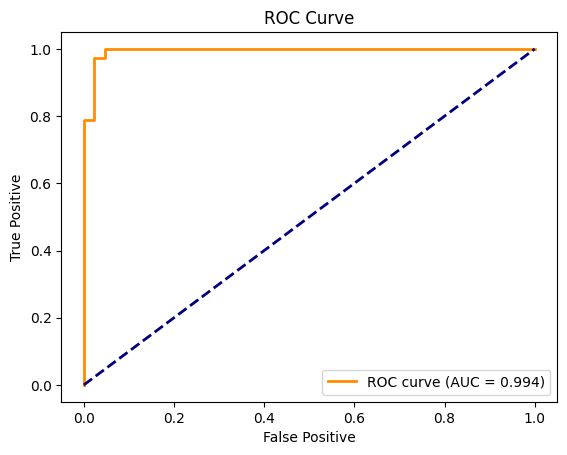

0.9944


In [25]:
# ROC Curve

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

print(f"{auc_roc:.4f}")

# ROC-кривая отображает соотношение между верно и неверно предсказанными
# положительными классами

# Чем больше площадь под ROC-кривой (AUC) тем качественнее классификатор
# разделяет классы

# Нам необходимо, чтобы "угол" кривой был как можно более приближен к левому
# верхнему углу поля

/tmp/ipython-input-2365583254.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


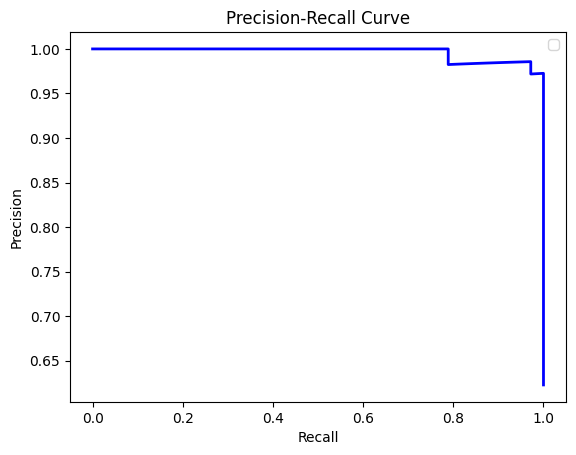

Precision: 0.9718
Recall:    0.9718


In [26]:
# Precision-Recall Curve

plt.plot(recall_curve, precision_curve, color='blue', lw=2)
plt.legend()
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# Precision-Recall дает более детальное представление о качестве классификации,
# учитывая возможный дисбаланс классов

# Precision - доля правильно предсказанных положительных случаев среди всех
# предсказанных положительных (насколько часто мы правы, предсказывая
# положительный класс)
# Precision = True Positive / (True Positive + False Positive)

# Recall - Доля правильно предсказанных положительных случаев среди всех
# реальных положительных (из всех реальных случаев, сколько предсказали мы)
# Recall = True Positive / (True Positive + False Negative)

# Чем ближе "угол" кривой к правому верхнему углу поля - тем лучше показатели

In [27]:
# F1 Score
print(f'{f1:.4f}')

# F1-Score - гармоническое среднее между Precision и Recall, она "наказывает" за
# большой дисбаланс между Precision и Recall

# Чем ближе F1-Score к 1, тем более точно модель классифицирует и тем более
# Precision и Recall отображают качество работы модели

0.9718


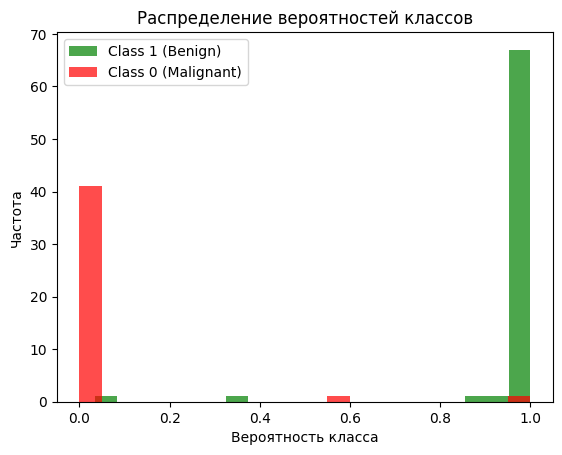

In [28]:
# Распределение вероятностей для классов

plt.hist(probs[labs == 1, 1], bins=20, alpha=0.7,
         label='Class 1 (Benign)', color='green')
plt.hist(probs[labs == 0, 1], bins=20, alpha=0.7,
         label='Class 0 (Malignant)', color='red')
plt.legend()
plt.title('Распределение вероятностей классов')
plt.xlabel('Вероятность класса')
plt.ylabel('Частота')
plt.show()